In [110]:

import scipy as sp
from scipy.spatial.distance import squareform, pdist

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold

# para testes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss, accuracy_score

#graficos
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

dfac = pd.read_csv('dados/mfeat-fac', delim_whitespace=True, header=None)
dfou = pd.read_csv('dados/mfeat-fou', delim_whitespace=True, header=None)
dkar = pd.read_csv('dados/mfeat-kar', delim_whitespace=True, header=None)

#cria array com 2000 elementos, onde os 200 primmeiros elementos possuem a classe 0, os proximos 200
#elementos possuem a classe 1, ...
classes = np.array([])
for i in range (2000):
    classes = np.append(classes,int(i/200))
classes[198:203]

array([ 0.,  0.,  1.,  1.,  1.])

In [111]:
# CLASSIFICADOR

def classificador(dadosTreino, classesTreino, dadosTeste, classesTeste):
    # teste com KNN (apenas teste - substituir pelo classificador solicitaco na questao)        
        
    # Constrói um classificador knn e treina ele com dados da visão 2    
    clf_knn2 = KNeighborsClassifier(n_neighbors=5) # cria o classificador
    clf_knn2.fit(dadosTreino, classesTreino)       # treina
    knn2_pred = clf_knn2.predict(dadosTeste)       # faz o teste

    # print(str(knn2_pred)) # predição
    
    #err_knn2 = zero_one_loss(classesTeste, knn2_pred)    # computa o resultado - taxa de erro
    err_knn2 = accuracy_score(classesTeste, knn2_pred)    # computa o resultado - taxa de acerto

    return err_knn2
    

In [112]:
# embaralha os dados
# encontra 10 folds
# separa treina, classifica e encontra a taxa de acerto 
def core(matrizDados, classes):
    saida = []

    # 30 rodadas 
    for i in range(30):
      
        # embaralha a matriz de dados e as classes ao mesmo tempo
        dados, classesEmbaralhadas = shuffle(matrizDados, classes, random_state=i)

        # 10 folds
        skf = StratifiedKFold(10)

        for indicesTreino, indicesTeste in skf.split(dados, classesEmbaralhadas):
            dadosTreino = dados.loc[indicesTreino]
            dadosTeste  = dados.loc[indicesTeste]        
            classesTreino = classes[indicesTreino]
            classesTeste  = classes[indicesTeste] 

            
            # CLASSIFICAÇÃO
            # teste com KNN (apenas teste - substituir pelo classificador solicitaco na questao)        
            # Constrói um classificador knn e treina ele com dados da visão 2
            ##clf_knn2 = KNeighborsClassifier(n_neighbors=5) # cria o classificador
            ##clf_knn2.fit(dadosTreino, classesTreino)       # treina
            ##knn2_pred = clf_knn2.predict(dadosTeste)       # faz o teste
            #err_knn2 = zero_one_loss(classesTeste, knn2_pred)    # computa o resultado - taxa de erro
            ## err_knn2 = accuracy_score(classesTeste, knn2_pred)    # computa o resultado - taxa de acerto
            ##saida.append(err_knn2)
            
            saida.append(classificador(dadosTreino, classesTreino, dadosTeste, classesTeste))

            
        # ESTIMATIVA PONTUAL
        media = np.mean(saida)
        
    return saida, media

In [113]:
# Classifica e mostra o resultado
def fazTudo(nomeDados, dados, classes):
    resultado, estimativaPontual = core(dados, classes)
    print("média dos " + str(len(resultado)) + " resultados de " + nomeDados + ": " +  str(estimativaPontual))
    resultadoOrdenado = np.sort(resultado)
    frame = pd.DataFrame(resultadoOrdenado)
    frame.plot(figsize=(12,5))


média dos 300 resultados de DFAC: 0.741316666667
média dos 300 resultados de DFOU: 0.668816666667
média dos 300 resultados de DKAR: 0.858616666667


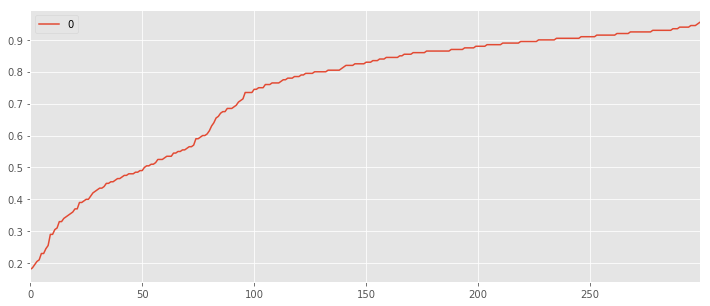

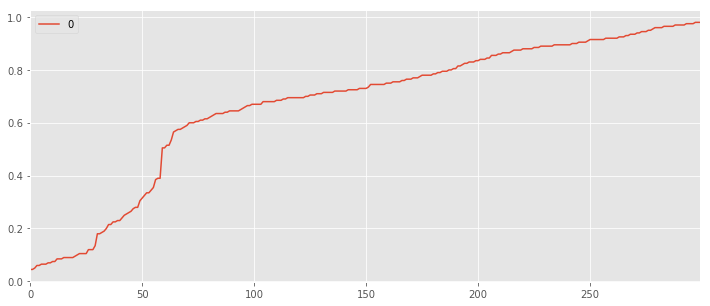

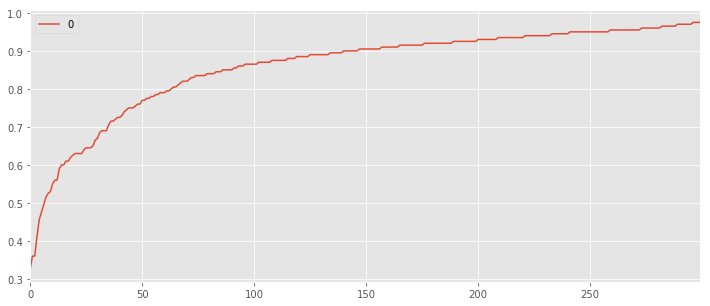

In [114]:

fazTudo("DFAC", dfac, classes)
fazTudo("DFOU", dfou, classes)
fazTudo("DKAR", dkar, classes)
